# Matthew Buttler Ives - Assignment #1
## Data Science Lifecycle
### Machine Learning Enterprise DS & ML in Production #1

In [34]:
## First, lets import the packages used in the ageron/handson-ml2 github example

In [35]:
# Scikit-Learn 
import sklearn as sk

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline  
#Note: I did not initially know what this command above did, but I found it's purpose through the power of google
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)




### Now, lets import the data for this assignment. I decided to study the price movement of the cryptocurrency Ethereum. Personally, I invest in cryptocurrency and I have always been interested in studying how to make better investments using insights from analytics. (I don't invest in NFT's though, I am not that crazy :) )

### The dataset can be found here: https://www.kaggle.com/varpit94/ethereum-data
### It is almost identical to the dataset I emailed to Professor Fatih, with the only difference that price data is included for November & December 2021.

In [36]:
# Framing the problem:
# The purpose of analyzing the price movement of cryptocurrency (or a stock)
# is to determine when an investor should invest into the market
# in order to maximize expected profit while minimizing desired risk.
# Several institutions along with financial advisors study historical price data to find opportunties
# to enter the market to generate the most profit.
# This practice can be extended to the analysis of Ethereum. Ethereum is a cryptocurrency that is 
# slightly different from other cryptocurrencies like bitcoin in that it allows for the development of 
# applications on its blockchain that anyone in the world can use
# as long as they have an internet connection. 

# Ether is the fuel used in the Ethereum Blockchain and what investors are actually purchasing
# if they decided to invest. The analysis of Ether's price movement is very 
# similar to a technical analysis, another application that studies 
# historical price movement practiced by banks and finanical institutions. These types of analysis
# are very useful as they often go alongside a fundamental analysis to assist investors to make wise financial 
# decisions. 

# The peformance of this model will be indicated by it's ability to 
# generate an almost risk-free return for the investor. The minimum standard
# of performance is set by the average market return. If the user cannot beat the market
# using this model, than there is no purpose for this model as any investor
# could arbitrarily choose to enter/exit the market and perform just as well
# as using the model.

In [37]:
# Data Acquisition:
# All data was publicly available and free to use
import pandas as pd
Edf = pd.read_excel("/Users/matthewbuttlerives/Desktop/Data Folder/ETH-USD.xlsx")

In [38]:
# Overview of the dataset

In [39]:
Edf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [40]:
Edf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2310,2021-12-03,4514.355957,4647.289063,4100.145508,4220.706055,4220.706055,2.587959e+10
2311,2021-12-04,4227.762207,4242.725586,3525.494141,4119.587402,4119.587402,3.847900e+10
2312,2021-12-05,4119.628906,4246.923340,4040.217529,4198.322754,4198.322754,2.553306e+10
2313,2021-12-06,4199.000000,4375.520508,3930.806641,4358.737305,4358.737305,2.822952e+10
2314,2021-12-07,4369.082520,4422.318848,4319.897949,4396.020020,4396.020020,2.622734e+10


In [41]:
Edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2315 entries, 0 to 2314
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2315 non-null   object 
 1   Open       2311 non-null   float64
 2   High       2311 non-null   float64
 3   Low        2311 non-null   float64
 4   Close      2311 non-null   float64
 5   Adj Close  2311 non-null   float64
 6   Volume     2311 non-null   float64
dtypes: float64(6), object(1)
memory usage: 126.7+ KB


In [42]:
# The dataset has four null values out of 2315 so I will drop them from the dataset
Edf_clean = Edf.dropna()
Edf_clean.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [43]:
Edf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 2314
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2311 non-null   object 
 1   Open       2311 non-null   float64
 2   High       2311 non-null   float64
 3   Low        2311 non-null   float64
 4   Close      2311 non-null   float64
 5   Adj Close  2311 non-null   float64
 6   Volume     2311 non-null   float64
dtypes: float64(6), object(1)
memory usage: 144.4+ KB


In [44]:
# This code provides a summary of the dataset
Edf_clean.describe()
# Interestingly, mean values are lower than the current price of Ethereum ($3,191 USD - Jan 17, 2022)
# This is likely due to the significant price movement over the past three years

,Open,High,Low,Close,Adj Close,Volume
count,2311.000000,2311.000000,2311.000000,2311.000000,2311.000000,2.311000e+03
mean,586.152321,607.796072,562.534860,587.883598,587.883598,7.924341e+09
std,979.239557,1014.489239,940.710368,981.920997,981.920997,1.089825e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,19.162551,20.078651,18.387000,19.317300,19.317300,6.490105e+07
50%,212.198242,220.236389,206.572998,212.339081,212.339081,2.552507e+09
75%,472.559998,482.841003,458.204987,473.202011,473.202011,1.201236e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


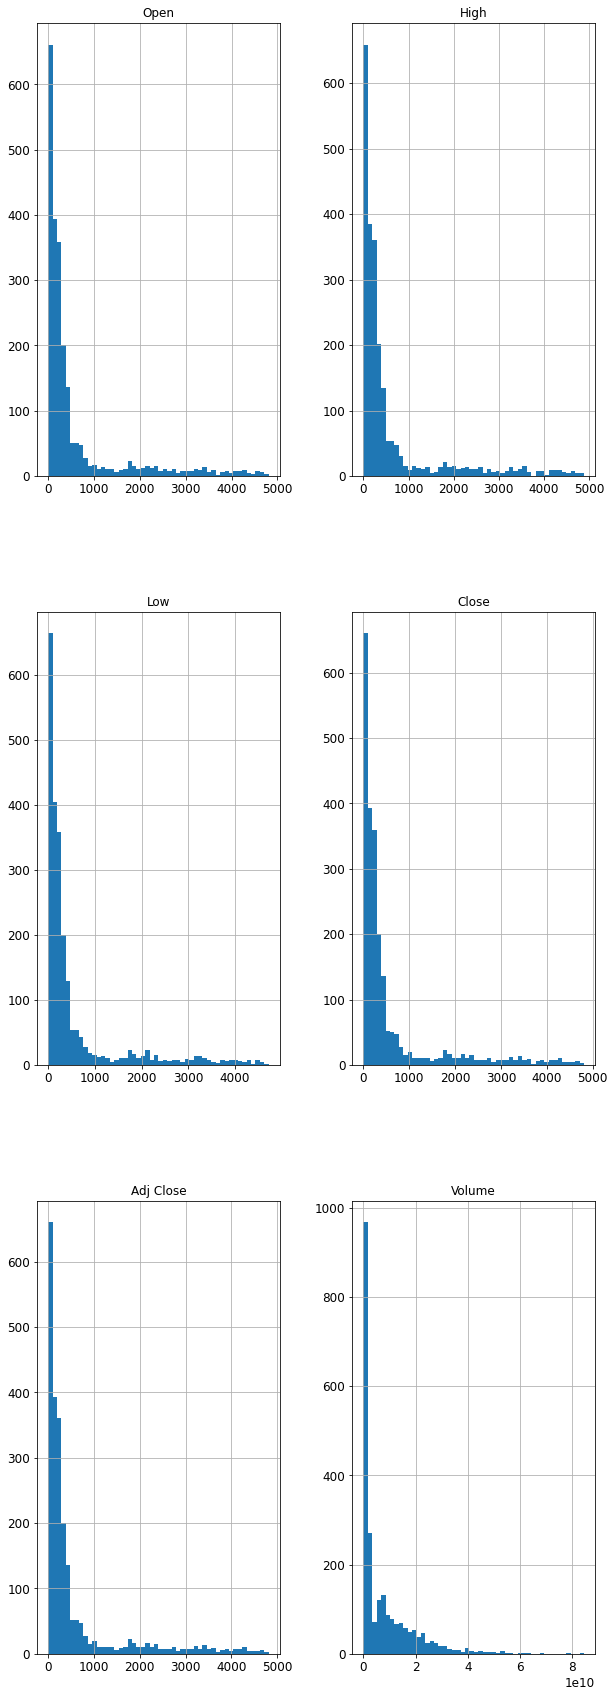

In [45]:
# This is code borrowed from the example github with minor modifactions for visual apperance

Edf_clean.hist(bins=50, figsize=(10,30))
plt.show()

In [46]:
# These histograms indicate that much of the recent price movement where Ethereum was trading 
# at levels above $1,000 don't reflect most of Ethereum's price movement

# ploting for the price movement
# Reference for code from: https://medium.com/bitgrit-data-science-publication/ethereum-price-prediction-with-python-3b3805e6e512
import plotly.graph_objects as go

x = Edf_clean["Date"]
y = Edf_clean["Open"]


fig = go.Figure()

fig.add_trace(go.Scatter(x=x,y=y, name = "Ethereum"))


fig.update_layout(
    title_text="Time series plot of Ethereum Open Price",)

In [47]:
# I included a graph of the price movement of Ethereum alongside Bitcoin for comparisons purposes
import plotly.graph_objects as go
bitcoin = pd.read_csv("/Users/matthewbuttlerives/Downloads/Bitcoin Historical Data - Investing.com Canada.csv")

Bitcoin = bitcoin[::-1]
x = Edf_clean["Date"]
y = Edf_clean["Open"]
Y = Bitcoin["Open"]


fig = go.Figure()

fig.add_trace(go.Scatter(x=x,y=y, name = "Ethereum"))
fig.add_trace(go.Scatter(x=x,y=Y, name = "Bitcoin"))


fig.update_layout(
    title_text="Time series plot of Ethereum Open Price with Bitcoin Open Price",)


## Setting up the Test Set

In [48]:
# random seed from github example
np.random.seed(42)

In [49]:
# The github example provides us with a function that achieves split_train_test.
# Using what I have learned from Warut's class, 
# I will use sklearn along with other relavant packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [50]:
# As this is time series data, training and testing will have to be spilt
# by date. For the purpose of this assignment, I will train the model on
# price data between 2015-2020 (inclusive) and test it on 2021.
train_set = Edf_clean[Edf_clean['Date'] < '2021-01-01']
test_set = Edf_clean[Edf_clean['Date'] >= '2021-01-01']
# test size and random state were selected to be consistent with github example

In [51]:
len(train_set)

1970

In [52]:
train_set.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1969,2020-12-27,635.887146,711.393555,628.334961,682.642334,682.642334,2.609355e+10
1970,2020-12-28,683.205811,745.877747,683.205811,730.397339,730.397339,2.422257e+10
1971,2020-12-29,730.358704,737.952881,692.149414,731.520142,731.520142,1.871068e+10
1972,2020-12-30,731.472839,754.303223,720.988892,751.618958,751.618958,1.729457e+10
1973,2020-12-31,751.626648,754.299438,726.511902,737.803406,737.803406,1.392685e+10


In [53]:
len(test_set)

341

In [54]:
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1974,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,1.365200e+10
1975,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,1.974077e+10
1976,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,4.520046e+10
1977,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,5.694599e+10
1978,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,4.153593e+10


In [55]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [56]:
# I had to do some external research for what the two functions above actually do.
# It seems that crc32 creates a 32 bit hash that is intended to check for data corruption
# which is just differences between source data and target data. The second function appears
# to spilt the dataset into training and testing by id

In [57]:
price_with_id = Edf_clean.reset_index() # adds an `index` column

In [58]:
price_with_id = price_with_id.dropna()
train_set = price_with_id[price_with_id['Date'] < '2021-01-01']
test_set = price_with_id[price_with_id['Date'] >= '2021-01-01']



In [59]:
test_set.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
1970,1974,2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,1.365200e+10
1971,1975,2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,1.974077e+10
1972,1976,2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,4.520046e+10
1973,1977,2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,5.694599e+10
1974,1978,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,4.153593e+10


<AxesSubplot:>

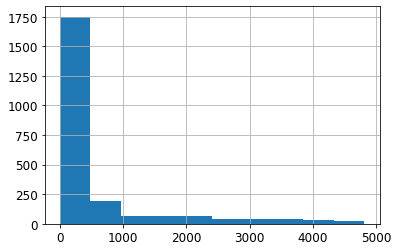

In [60]:
Edf_clean["Open"].hist()

In [61]:
# For this assignment, I will add Volume-Weighted Average Price to the dataset which is a calculation of the average price
# a security has traded throughout the day. I feel that the variable adds more context to the dataset.
#The formula and additional detail can be found here: https://www.investopedia.com/terms/v/vwap.asp

Edf_clean = pd.DataFrame(Edf_clean)
Edf_clean['Volume_Weighted_Average_Price']  = ''
Edf_clean = Edf_clean.reset_index()

Edf_clean = pd.DataFrame(Edf_clean)
for i in range(2311):
    x = ((((Edf_clean["High"][i] + Edf_clean["Low"][i] + Edf_clean["Close"][i])/3)*Edf_clean["Volume"][i])/Edf_clean["Volume"][i])
    Edf_clean['Volume_Weighted_Average_Price'][i] = x


/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_31556/1211443737.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
Edf_clean.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Weighted_Average_Price
0,0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0,2.943283
1,1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0,1.422287
2,2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0,0.736966
3,3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0,0.691616
4,4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0,0.954168


In [63]:
Edf_clean.tail()

,index,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Weighted_Average_Price
2306,2310,2021-12-03,4514.355957,4647.289063,4100.145508,4220.706055,4220.706055,2.587959e+10,4322.713542
2307,2311,2021-12-04,4227.762207,4242.725586,3525.494141,4119.587402,4119.587402,3.847900e+10,3962.602376
2308,2312,2021-12-05,4119.628906,4246.923340,4040.217529,4198.322754,4198.322754,2.553306e+10,4161.821208
2309,2313,2021-12-06,4199.000000,4375.520508,3930.806641,4358.737305,4358.737305,2.822952e+10,4221.688151
2310,2314,2021-12-07,4369.082520,4422.318848,4319.897949,4396.020020,4396.020020,2.622734e+10,4379.412272


In [64]:
# As this assignment desires some analysis with categorical variables, I will construct a binary categorical 
# variable that indicates the direction of the price movement of Ethereum for each day.
Edf_clean = Edf_clean.reset_index()

Edf_clean['Stock_Movement']  = ''
for i in range(2311):
    if Edf_clean["Open"][i] > Edf_clean["Close"][i]:
        x = "Down"
        Edf_clean['Stock_Movement'][i] = x
    else:
        x = "Up"
        Edf_clean['Stock_Movement'][i] = x


#Edf_clean["Stock_Movement"].value_counts()


/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_31556/930216922.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dq/3qj0hnk53pb8rjp2l_k7zby80000gn/T/ipykernel_31556/930216922.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

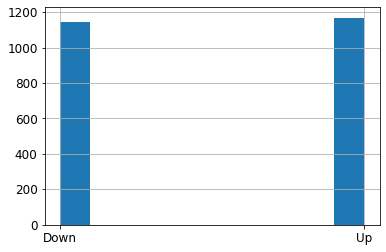

In [65]:
Edf_clean["Stock_Movement"].hist()

In [66]:
# I choose to include this graph as it provides a general indication
# that active trading (where investors buy and sell Ethereum on a daily basis) doesn't work
# and only ~51% of the time will it profit the investor and ~49% it will not profit the investor

In [67]:
Edf_clean["Open_cat"] = pd.cut(Edf_clean["Open"],
                               bins=[0., 100, 1000, 3000, 5000, np.inf],
                               labels=[0, 100, 1000, 3000, 5000])


In [68]:
Edf_clean["Open_cat"].value_counts()


100     1284
0        664
1000     232
3000     131
5000       0
Name: Open_cat, dtype: int64

<AxesSubplot:>

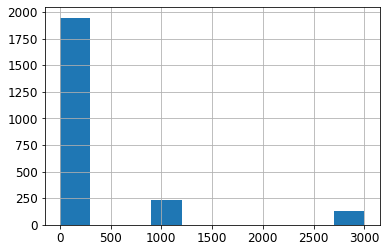

In [69]:
Edf_clean["Open_cat"].hist()

In [70]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Edf_clean, Edf_clean["Open_cat"]):
    strat_train_set = Edf_clean.loc[train_index]
    strat_test_set = Edf_clean.loc[test_index]

In [71]:
strat_test_set["Open_cat"].value_counts() / len(strat_test_set)

100     0.555076
0       0.287257
1000    0.101512
3000    0.056156
5000    0.000000
Name: Open_cat, dtype: float64

In [72]:
Edf_clean["Open_cat"].value_counts() / len(Edf_clean)

100     0.555604
0       0.287322
1000    0.100389
3000    0.056685
5000    0.000000
Name: Open_cat, dtype: float64

In [73]:
def income_cat_proportions(data):
    return data["Open_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(Edf_clean, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(Edf_clean),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [74]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.287322,0.287257,0.321814,12.004931,-0.022444
100,0.555604,0.555076,0.526998,-5.148597,-0.095039
1000,0.100389,0.101512,0.088553,-11.790608,1.118083
3000,0.056685,0.056156,0.062635,10.495771,-0.934826
5000,0.000000,0.000000,0.000000,NaN,NaN


In [75]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Open_cat", axis=1, inplace=True)

### Moving on to data Visualization
### Include visual graphs of price movement

### Examining Correlations

In [76]:
corr_matrix = Edf_clean.corr()

In [77]:
corr_matrix["Open"].sort_values(ascending=False)

Open         1.000000
High         0.999310
Low          0.998387
Close        0.998093
Adj Close    0.998093
Volume       0.672727
index        0.639039
level_0      0.638252
Name: Open, dtype: float64

In [78]:
Edf_clean.head()

,level_0,index,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Weighted_Average_Price,Stock_Movement,Open_cat
0,0,0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0,2.943283,Down,0
1,1,1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0,1.422287,Down,0
2,2,2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0,0.736966,Down,0
3,3,3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0,0.691616,Down,0
4,4,4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0,0.954168,Up,0


In [79]:
# As this is a dataset that contains information only related to one cryptocurrency and its historical 
# price movement, it makes logical sense that several variables are highly correlated

array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Adj Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Adj Close', ylabel='High'>,
        <AxesSubplot:xlabel='Volume', ylabel='High'>],
       [<AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Adj Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Volume', ylabel='Low'>],
       [<AxesSubplot:xlabel='Open', ylabel='Cl

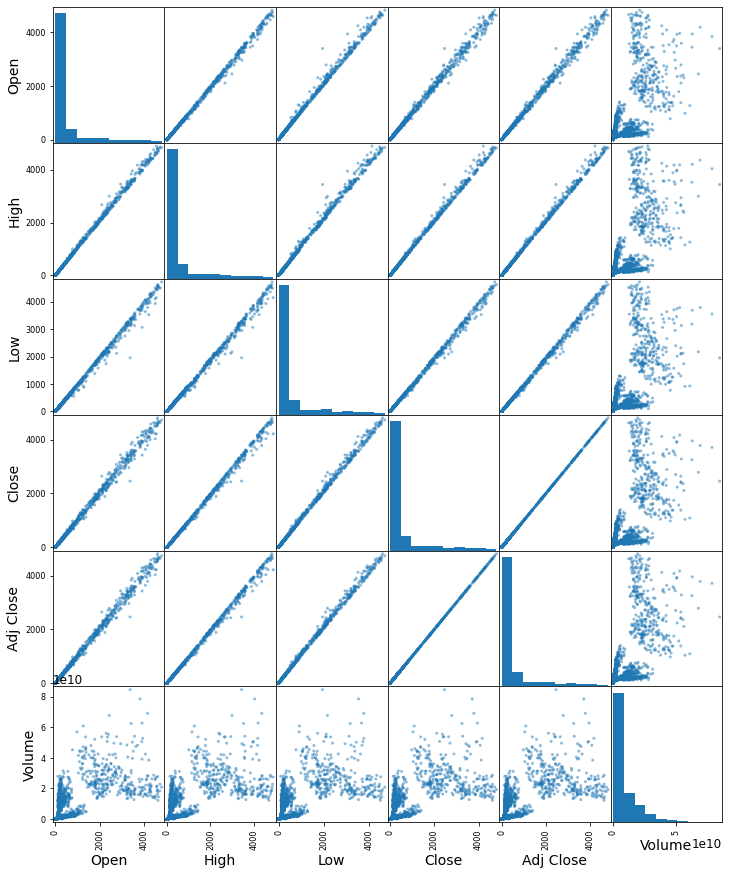

In [80]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Open", "High", "Low",
              "Close","Adj Close","Volume"]
scatter_matrix(Edf_clean[attributes], figsize=(12, 15))

In [84]:
# Again, many variables demonstrate very high to almost perfect positive correlation.
# The only variable that seems to have some difference in its correlation with other variables is Volume.

In [85]:
corr_matrix["Volume"].sort_values(ascending=False)

Volume       1.000000
index        0.771677
level_0      0.771139
High         0.679020
Open         0.672727
Close        0.670951
Adj Close    0.670951
Low          0.660078
Name: Volume, dtype: float64

In [86]:
# Interestingly, these variables are not as positively correlated. Using what I 
# learned through Professor Juan's class, anything above 0.85 would be 
# consider a problematic correlation as it would create multicollinearity
# within the model. However, given the purpose of this dataset, it will not be 
# an issue that requires correction.

(0.0, 5000.0, 0.0, 5000.0)

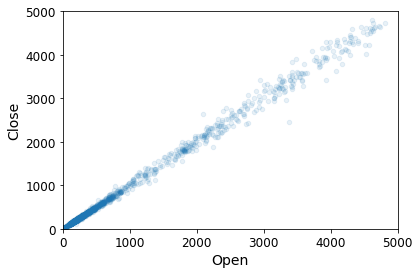

In [87]:
Edf_clean.plot(kind="scatter", x="Open", y="Close",
             alpha=0.1)
plt.axis([0, 5000, 0, 5000])

## Preparation of Data for Machine Learning

In [88]:
Edf_clean = strat_train_set.drop("Open", axis=1) # drop labels for training set
Edf_clean_labels = strat_train_set["Open"].copy()

In [89]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [91]:
# We have to drop date as it is not numeric
# Also have to drop stock movement as it is non numeric
Edf_Num = Edf_clean.drop("Date",axis = 1)
Edf_Num = Edf_Num.drop("Stock_Movement", axis=1)
imputer.fit(Edf_Num)

SimpleImputer(strategy='median')

In [92]:
imputer.statistics_

array([1.15450000e+03, 1.15450000e+03, 2.18156814e+02, 2.06031495e+02,
       2.12260208e+02, 2.12260208e+02, 2.50626198e+09, 2.12724848e+02])

In [93]:
Edf_Num.median().values

array([1.15450000e+03, 1.15450000e+03, 2.18156814e+02, 2.06031495e+02,
       2.12260208e+02, 2.12260208e+02, 2.50626198e+09, 2.12724848e+02])

In [94]:
X = imputer.transform(Edf_Num)

In [95]:
Edf_train = pd.DataFrame(X, columns=Edf_Num.columns,
                          index=Edf_clean.index)

In [96]:
Edf_train.head()

,level_0,index,High,Low,Close,Adj Close,Volume,Volume_Weighted_Average_Price
1721,1721.0,1722.0,190.210388,185.222107,189.236938,189.236938,1.678856e+10,188.223144
1902,1902.0,1906.0,417.159210,405.350647,406.217773,406.217773,1.089021e+10,409.575877
324,324.0,324.0,14.373900,13.656500,13.850200,13.850200,1.474760e+07,13.960200
787,787.0,787.0,302.920013,294.582001,297.475006,297.475006,3.394430e+08,298.325673
1557,1557.0,1557.0,190.338425,185.086319,185.489639,185.489639,7.877424e+09,186.971461


## Handling Text Variables
### In my case, it is modifying the text variable stock movement

In [97]:
Edf_cat = Edf_clean[["Stock_Movement"]]
Edf_cat.head(10)

,Stock_Movement
1721,Up
1902,Down
324,Down
787,Down
1557,Down
1419,Up
69,Up
2154,Up
320,Down
1746,Down


In [98]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
Edf_cat_encoded = ordinal_encoder.fit_transform(Edf_cat)
Edf_cat_encoded[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [99]:
ordinal_encoder.categories_

[array(['Down', 'Up'], dtype=object)]

In [100]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
Edf_cat_1hot = cat_encoder.fit_transform(Edf_cat)
Edf_cat_1hot

<1848x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1848 stored elements in Compressed Sparse Row format>

In [101]:
Edf_cat_1hot.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

## Transformation Pipeline

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [103]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

Edf_No_Date_tr = num_pipeline.fit_transform(Edf_Num)

In [104]:
Edf_No_Date_tr

array([[ 0.85063281,  0.84955759, -0.41136253, ..., -0.40618385,
         0.80275116, -0.40646248],
       [ 1.12286083,  1.12584452, -0.18802351, ..., -0.1852013 ,
         0.26746046, -0.18052016],
       [-1.25048623, -1.24962241, -0.58440221, ..., -0.58480519,
        -0.71951641, -0.58433863],
       ...,
       [-0.96020995, -0.95982145, -0.58684571, ..., -0.58846731,
        -0.71708335, -0.58785425],
       [-1.23394199, -1.23310526, -0.58814974, ..., -0.58861498,
        -0.71945655, -0.58821817],
       [ 0.18886303,  0.18736991, -0.48064727, ..., -0.47744346,
        -0.38898673, -0.48179315]])

In [105]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(Edf_Num)
cat_attribs = ["Stock_Movement"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

Edf_prepared = full_pipeline.fit_transform(Edf_clean)

In [106]:
Edf_prepared

array([[ 0.85063281,  0.84955759, -0.41136253, ..., -0.40646248,
         0.        ,  1.        ],
       [ 1.12286083,  1.12584452, -0.18802351, ..., -0.18052016,
         1.        ,  0.        ],
       [-1.25048623, -1.24962241, -0.58440221, ..., -0.58433863,
         1.        ,  0.        ],
       ...,
       [-0.96020995, -0.95982145, -0.58684571, ..., -0.58785425,
         1.        ,  0.        ],
       [-1.23394199, -1.23310526, -0.58814974, ..., -0.58821817,
         1.        ,  0.        ],
       [ 0.18886303,  0.18736991, -0.48064727, ..., -0.48179315,
         0.        ,  1.        ]])

In [107]:
Edf_prepared.shape

(1848, 10)

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [109]:
num_attribs = list(Edf_Num)
cat_attribs = ["Stock_Movement"]

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [110]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [111]:
New_Edf_prepared = old_full_pipeline.fit_transform(Edf_clean)
New_Edf_prepared

array([[ 0.85063281,  0.84955759, -0.41136253, ..., -0.40646248,
         0.        ,  1.        ],
       [ 1.12286083,  1.12584452, -0.18802351, ..., -0.18052016,
         1.        ,  0.        ],
       [-1.25048623, -1.24962241, -0.58440221, ..., -0.58433863,
         1.        ,  0.        ],
       ...,
       [-0.96020995, -0.95982145, -0.58684571, ..., -0.58785425,
         1.        ,  0.        ],
       [-1.23394199, -1.23310526, -0.58814974, ..., -0.58821817,
         1.        ,  0.        ],
       [ 0.18886303,  0.18736991, -0.48064727, ..., -0.48179315,
         0.        ,  1.        ]])

In [112]:
np.allclose(Edf_prepared, New_Edf_prepared)

True

### Now on to the fun stuff,
# Building a model

In [113]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Edf_prepared, Edf_clean_labels)

LinearRegression()

In [114]:
# For my first attempt, I will use all available date to make predicitions
All_data_prepared = full_pipeline.transform(Edf_clean)

print("Predictions:", lin_reg.predict(All_data_prepared))

Predictions: [177.82294218 423.1283883   18.96903952 ...  17.24846391  15.2295537
 106.42684086]


In [115]:
print("Labels:", list(Edf_clean_labels))

Labels: [185.222107, 412.457642, 14.2611, 302.481995, 189.50293, 317.992584, 0.523278, 2226.550293, 13.1997, 214.604935, 370.380005, 1716.40564, 616.722778, 229.762299, 229.123001, 268.692261, 136.190674, 10.4314, 752.570007, 784.583008, 3174.269775, 395.226868, 149.197601, 13.4505, 162.514114, 188.644257, 13.5428, 142.697006, 12.3894, 215.220993, 546.625977, 271.743103, 151.224396, 1703.036133, 116.979095, 206.735992, 13.2156, 1823.158447, 11.5402, 4522.208984, 2852.558838, 2857.165527, 209.628006, 354.587219, 4213.910645, 265.056854, 377.8685, 4724.306641, 365.865784, 3452.54834, 1223.740479, 293.537262, 305.480988, 153.069244, 284.119995, 12.0372, 556.721985, 763.369995, 291.47699, 499.459991, 1919.157227, 123.654655, 243.750198, 288.497009, 251.249313, 185.841095, 1768.039795, 9.39673, 0.891217, 189.3741, 9.88765, 1.81092, 48.592499, 1.01711, 707.737, 11.7846, 152.491928, 2772.838379, 128.629257, 158.499771, 9.48282, 686.591003, 479.906006, 133.567154, 3419.726807, 12.7435, 226.657

In [116]:
# Interestingly, it doesn't appear that my predictions are that awful. This is just a first glance and will require
# cross validation and mean squared error (MSE).

In [117]:
from sklearn.metrics import mean_squared_error

Edf_predictions = lin_reg.predict(Edf_prepared)
lin_mse = mean_squared_error(Edf_clean_labels, Edf_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

27.416570942843826

In [119]:
# I learned during my time in Professor Warut's class that the size of MSE does not matter and is only relevant
# in the context of the dataset. Beyond this github example, I learned of Absolute MSE which is a measure 
# of MSE that can be used to compare one model's MSE to another.

In [120]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(Edf_clean_labels, Edf_predictions)
lin_mae

12.793753009900156

### Implementing Cross-Validation to Evaluate the Model

In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(Edf_prepared, Edf_clean_labels)

scores = cross_val_score(tree_reg, Edf_prepared, Edf_clean_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [125]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [46.58084138 47.53481239 44.09116618 33.81350011 25.15743808 42.64822767
 53.01655619 39.91748228 40.76431144 60.14631246]
Mean: 43.36706481958812
Standard deviation: 9.192009647693466


In [126]:
scores = cross_val_score(lin_reg, Edf_prepared, Edf_clean_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean     27.855705
std       7.890571
min      16.434507
25%      21.722122
50%      28.034907
75%      34.243389
max      39.305786
dtype: float64

In [127]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(Edf_prepared, Edf_clean_labels)
Edf_predictions = svm_reg.predict(Edf_prepared)
svm_mse = mean_squared_error(Edf_clean_labels, Edf_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

47.13531930378709

In [128]:
### Overall, the model seems to function appropriately

In [ ]:
### Examining hyperparamters and fine tuning the model is optional
### but I will include it in this assignment. First, I will use
### the code provided in the github example.

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(Edf_prepared, Edf_clean_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [135]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [145]:
# Interestingly, the maximum number of features for this model should be
# equal to 3 with 10 number of estimators.

In [143]:
# I am running gride search again with my own selection of parameters 
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [1, 50, 100], 'max_features': [5, 10, 15, 20]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [5, 20], 'max_features': [5, 6, 7]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(Edf_prepared, Edf_clean_labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [5, 10, 15, 20],
                          'n_estimators': [1, 50, 100]},
                         {'bootstrap': [False], 'max_features': [5, 6, 7],
                          'n_estimators': [5, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [144]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 5, 'n_estimators': 20}

In [146]:
# Here, the best parameters have changed to 5 for the maximum number of 
# features with 20 estimators

### Finally, it is time to evaluate the model's results on the Test Data Set

In [147]:
Matts_final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("Open", axis = 1)
Y_test = strat_test_set["Open"].copy()

In [148]:
X_test_prepared = full_pipeline.transform(X_test)

In [149]:
Matts_Final_Predictions = Matts_final_model.predict(X_test_prepared)

In [150]:
final_mse = mean_squared_error(Y_test, Matts_Final_Predictions)
final_rmse = np.sqrt(final_mse)

In [151]:
final_rmse

37.32589785308302

In [152]:
# We can also include a confidence interval
from scipy import stats

confidence = 0.95
squared_errors = (Matts_Final_Predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([29.24510253, 43.94507116])

In [153]:
# 99% confidence interval
confidence = 0.99
squared_errors = (Matts_Final_Predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([26.17572288, 45.83968622])

In [155]:
# Overall, it seems the model works well. However, I would appreciate any criticism 
# on my model as from my research, predicting future stock movement
# is incredible difficult with several models failing to make relevant predictions
# and investors lsoing large sums of money. This may be a situation of overfitting
# where the model does very well in prediciting historical price data but very 
# poorly in prediciting new price movement. I have never attempted to analyze
# price movement before so I used this assignment to experiment how I should construct
# a model like this and see how it would perform.